
## Introduction

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem we need to predict price range of mobile phones.


## Import Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Basic Data Analysis

In [2]:
# Reading Train and Test data in Data Frame
df_train_og = pd.read_csv("train.csv")
df_test_og = pd.read_csv("test.csv")

### Column Name and Descriptions

1. battery_power = Battery Power in hz 
2. blue = Bluetooth available or not 
3. clock_speed = Microprocesssor Speed
4. dual_sim = Has Dual Sim Card or Not
5. fc = Front Camera Mega Pixels
6. four_g = 4G or Not
7. int_memory  = Internal Memory in GB
8. m_dep = Mobile Depth
9. mobile_wt = Weight of mobile phone
10. n_cores = Number of cores of processor
11. pc = Primary Camera mega pixels
12. px_height = Pixel Resolution Height
13. px_width = Pixel Resolution Width
14. ram = Random Access Memory in Megabytes
15. sc_height = Screen Height of mobile in cm
16. sc_width = Screen Width of mobile in cm
17. talk_time = longest time that a single battery charge will last when you are
18. three_g = Has 3G or not
19. touch_screen = Has touch screen or not
20. wifi = Has wifi or not
21. price_range = 0 : low cost, 1: mid cost, 2: High Cost

In [3]:
# Displaying first 5 rows of train data
df_train_og.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Displaying first 5 rows of test data
df_test_og.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [5]:
# Number of values in train and test data frames
print("Number of Train Data is {}.".format(df_train_og.shape[0]))
print("Number of Test Data is {}.".format(df_test_og.shape[0]))

Number of Train Data is 2000.
Number of Test Data is 1000.


In [6]:
# Dropping id column in test data
df_test_og = df_test_og.drop(["id"],axis=1)

In [7]:
# Checking null values in train dataset
df_train_og.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# Checking null values in test dataset
df_test_og.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### No missing data in training or test data

### price_range is the dependent variable and rest of the features are independent variables. 

## Exploratory Data Analysis and Visualization

Text(0.5, 1.0, 'Correlation Heatmap')

<Figure size 432x288 with 0 Axes>

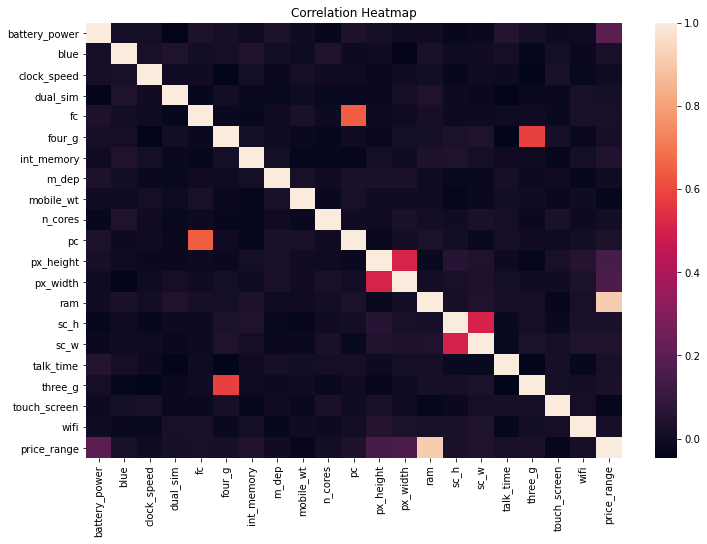

In [9]:
corr = df_train_og.corr()
fig = plt.figure()
plt.figure(figsize=(12,8))
r = sns.heatmap(corr)
r.set_title("Correlation Heatmap")

In [10]:
# Sorting from highest to lowest correlated columns
corr.sort_values(by=['price_range'], ascending = False)['price_range']

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

### From this data we can say that ram of the phone is the most significat factor in price range because it has high correlation.


## Modelling

In [11]:
# Creating X and y where X has all independent variables and y is the dependet variable
X = df_train_og.drop("price_range",axis=1)
y=df_train_og["price_range"]

In [12]:
# Creating a 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 10)

### Logistic Regression without Standardizing or Scaling

In [13]:
def LogisticReg(XTrain,yTrain,XTest,yTest):
    logmodel=LogisticRegression()
    logmodel.fit(XTrain,yTrain)
    print(logmodel.score(XTest,yTest))
    pp=logmodel.predict(XTest)
    print("price 0", sum(pp==0))
    print("price 1", sum(pp==1))
    print("price 2", sum(pp==2))
    # Accuracy of Logistic Regression
    prediction_lr=logmodel.predict(XTest)
    print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,yTest)*100,2))

In [14]:
LogisticReg(X_train,y_train,X_test,y_test)

0.6425
price 0 90
price 1 104
price 2 95
The accuracy of the Logistic Regression is 64.25


C:\Users\absol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Regression has acheived an accuracy of 64%

### K-Nearest Neighbor Technique

In [15]:
# KNN Model with neighbors = 10
def KNN(XTrain,yTrain,XTest,yTest):
    knn = KNeighborsClassifier(n_neighbors=10)
    # Fitting train data on logistic regression model
    knn.fit(XTrain,yTrain)
    # Evaluating KNN
    print(knn.score(XTest,yTest))

In [16]:
KNN(X_train,y_train,X_test,y_test)

0.9075


#### KNN has acheived an accuracy of 90.75%

### Standardizing the data before Logistic Regression

In [17]:
from tqdm.auto import tqdm
categorical_columns = []
numerical_columns = []
for c in tqdm(df_train_og.columns,total=len(df_train_og.columns)):
    if(len(df_train_og[c].value_counts())<=10):
        categorical_columns.append(c)
    else:
        numerical_columns.append(c)

In [18]:
scaler = StandardScaler()

In [19]:
def transform_numeric_features(train_data,numerical_columns):
    for col in numerical_columns:
        X = np.array(train_data[col]).reshape(-1,1)
        train_data[col] = scaler.fit_transform(X)
    return train_data

In [20]:
train_data_transformed = transform_numeric_features(df_train_og,numerical_columns)

In [21]:
y_new = train_data_transformed["price_range"]
X_new = train_data_transformed.drop(columns=["price_range"],axis=1)

In [22]:
categorical_columns.remove("price_range")
X_new = pd.get_dummies(X_new,columns=categorical_columns,prefix_sep="_")

In [23]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new, test_size = 0.2,random_state = 10)

In [24]:
LogisticReg(X_train_new,y_train_new,X_test_new,y_test_new)

0.955
price 0 95
price 1 102
price 2 102
The accuracy of the Logistic Regression is 95.5


C:\Users\absol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Accuracy increased from 63% to 96% when we standardize the data.

### Selecting best features before Logistic Regression

In [25]:
# Selecting top features
topFeatures = SelectKBest(score_func=chi2, k=10)
fit = topFeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
scoreFeatures = pd.concat([dfcolumns,dfscores],axis=1)
scoreFeatures.columns = ['Specs','Score']  #naming the dataframe columns
top_10_imp_feature = scoreFeatures.nlargest(10,'Score')["Specs"].values

In [26]:
# Creating X and Y based on top 10 important feature
X_top = df_train_og[top_10_imp_feature]
y_top = df_train_og["price_range"]

In [28]:
from tqdm.auto import tqdm
categorical_columns1 = []
numerical_columns1 = []
for c in tqdm(X_top.columns,total=len(X_top.columns)):
    if(len(X_top[c].value_counts())<=10):
        categorical_columns1.append(c)
    else:
        numerical_columns1.append(c)

In [29]:
X3 = transform_numeric_features(X_top,numerical_columns1)

<ipython-input-19-7e5b504e5efc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = scaler.fit_transform(X)
<ipython-input-19-7e5b504e5efc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = scaler.fit_transform(X)
<ipython-input-19-7e5b504e5efc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [30]:
X_top = pd.get_dummies(X_top,columns=categorical_columns1,prefix_sep="_")

In [31]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_top,y_top, test_size = 0.2,random_state = 10)

In [32]:
LogisticReg(X_train_feat,y_train_feat,X_test_feat,y_test_feat)

0.9725
price 0 94
price 1 99
price 2 106
The accuracy of the Logistic Regression is 97.25


#### Accuracy increased from 95.5% to 97.25% when we standardize the data.